### Load the Reddit TLDR dataset
#### Find documents with highest toxicity classification


In [1]:
# For reloading the functions from .py files so that we do not need to restart the kernel everytime
%load_ext autoreload
%autoreload 2 

### Only run the next cell if you want to subsample the dataset again, otherwise move to next code cell.

In [8]:
%load_ext autoreload
%autoreload 2 

from data.dataset_loader import DataSetLoader

loader = DataSetLoader()
dataset = loader.load(debug_mode=True, batch_size=128,num_entries= 20000)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading reddit_tldr dataset...


Loading dataset shards:   0%|          | 0/38 [00:00<?, ?it/s]

Debug mode: Using subset of data
Processing dataset...


Processing reddit_tldr dataset:   0%|          | 0/20000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/20000 [00:00<?, ? examples/s]

### Dataset sampled for 20000 entries
 - detoxify model ran for all those entries for baseline summaries and documents.
 - We identify the top 1000 entries with highest document toxicity and visualise it

In [2]:
from datasets import load_from_disk
import pandas as pd

file ='data/reddit_tldr_20250603185109_debug_True.parquet'
dataset = load_from_disk(file)
df_dataset = dataset.to_pandas()


display(df_dataset.document_toxicity_detoxify.max())
display(df_dataset.document_toxicity_detoxify.min())
display(df_dataset.document_toxicity_detoxify.mean())


0.998914361000061

0.0004976990167051554

0.10141013004896231

### For the documents, find the top 1000 documents with higest toxicity using Detoxify model

- Alternatively try to subsample the dataset, then run sentiment classification and then create set of 1000 entries, maybe 50-50 for both.

In [3]:
df_dataset.sort_values(by='document_toxicity_detoxify', ascending=False, inplace=True)
top_1000 = df_dataset[df_dataset['document_length'] > 300]
top_1000 = top_1000.head(1000)
top_1000.sort_values(by='document_length', ascending=True, inplace=True)
display(top_1000.head(10))

,document,document_length,summary_baseline,summary_length_baseline,document_toxicity_detoxify,summary_toxicity_detoxify,document_severe_toxicity_detoxify,summary_severe_toxicity_detoxify,document_obscene_detoxify,summary_obscene_detoxify,document_threat_detoxify,summary_threat_detoxify,document_insult_detoxify,summary_insult_detoxify,document_identity_attack_detoxify,summary_identity_attack_detoxify
8365,"No, I'm borderline normal + socially awkward. ...",301,Fuck you I know who I am and I never wear hats.,47,0.973946,0.997172,0.038911,0.291139,0.918181,0.989769,0.002460,0.003992,0.272862,0.791984,0.008367,0.007863
6231,FUCK FAT PEOPLE! No kidding actually hate thos...,303,FAT PEOPLE ARE FAT FOR A FUCKING REASON.,40,0.998914,0.998090,0.601286,0.459904,0.993602,0.982007,0.014197,0.013957,0.974800,0.960813,0.478116,0.763230
3152,I can't even tell what point is being debated ...,304,Who gives a fuck?,17,0.948113,0.992822,0.026053,0.148043,0.900991,0.980018,0.001854,0.002495,0.201711,0.355109,0.004228,0.003972
12239,"Listen here, fuckwad. \n If there is infrastru...",307,Stop being a fucking douche and realize how mu...,69,0.991378,0.997110,0.081026,0.244730,0.959938,0.983284,0.001662,0.002076,0.755579,0.932447,0.004769,0.010455
2490,My dog is scared of black people... I live in ...,308,My dog is a racist ass!,23,0.921662,0.994286,0.065660,0.104069,0.751153,0.949965,0.015513,0.002128,0.598037,0.846541,0.520041,0.073316
3963,"Oh I'm the arrogant asshole, I'm just saying h...",310,you're being a hypocrite and are butt hurt ;),45,0.982869,0.971003,0.058188,0.013631,0.935442,0.436273,0.001238,0.001140,0.823637,0.859320,0.010894,0.013790
4615,"I love everything about a woman's body,I'll li...",311,"Ew, she's actually doing it, and it feels fuck...",56,0.985884,0.978760,0.092007,0.076246,0.960301,0.960294,0.006507,0.002667,0.166983,0.126726,0.004291,0.002239
241,Ugh gays have it so easy. Every fucking romanc...,311,you're dumb,11,0.984517,0.979013,0.143886,0.024982,0.924877,0.571120,0.010145,0.001163,0.602094,0.943802,0.545560,0.013985
6743,Well no shit Sherlock. \nHere's the deal: she ...,314,Don't piss your girlfriend off and then watch ...,79,0.982936,0.968255,0.058191,0.013943,0.934920,0.700525,0.009990,0.001293,0.437272,0.548785,0.005431,0.003159
14674,I wonder if you would really be better off. Ho...,315,What the child needs may be more money than ou...,69,0.774912,0.004168,0.009442,0.000098,0.766504,0.000180,0.001571,0.000107,0.089234,0.000358,0.003069,0.000280


### Distribution of toxicity of documents and summaries

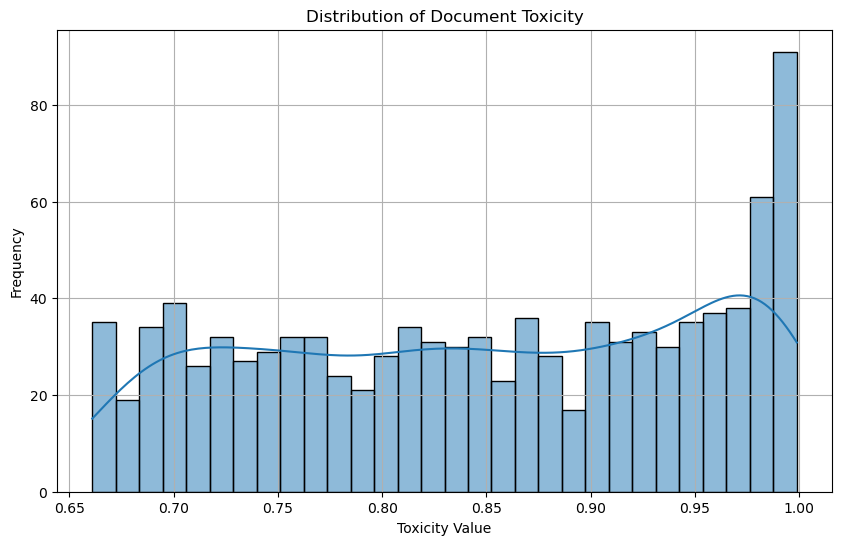

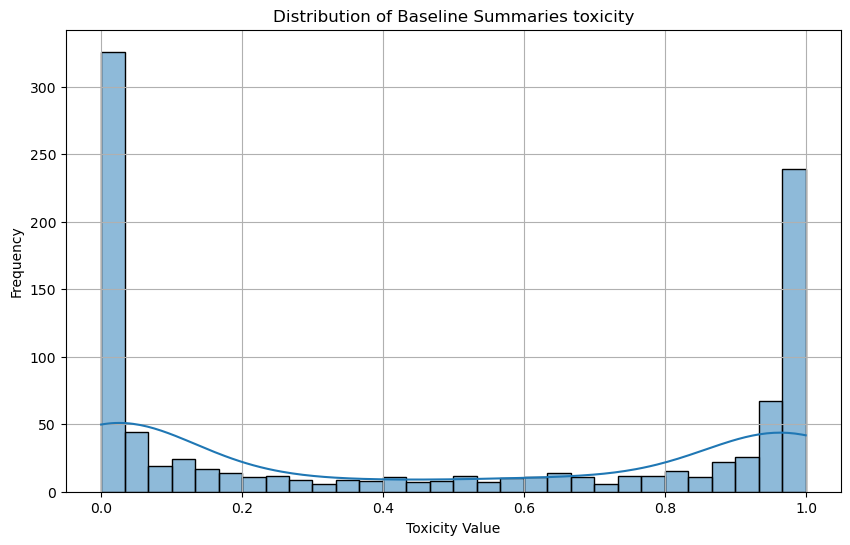

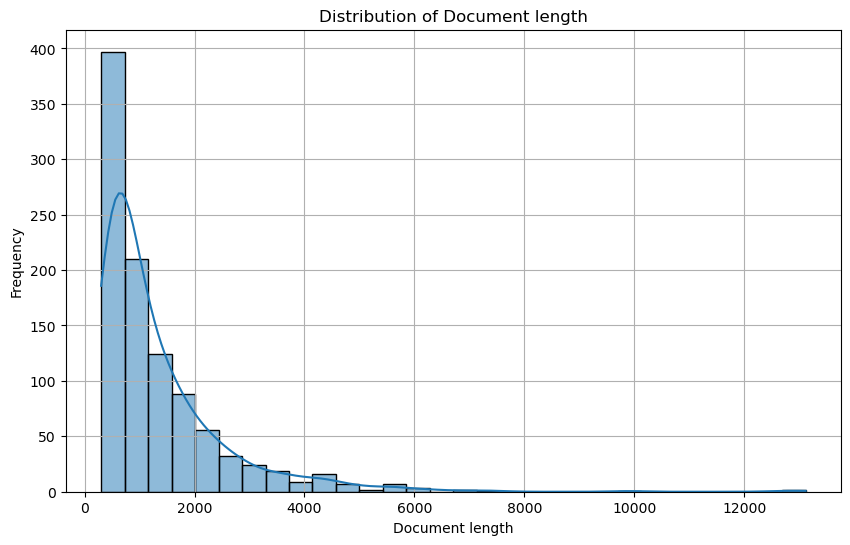

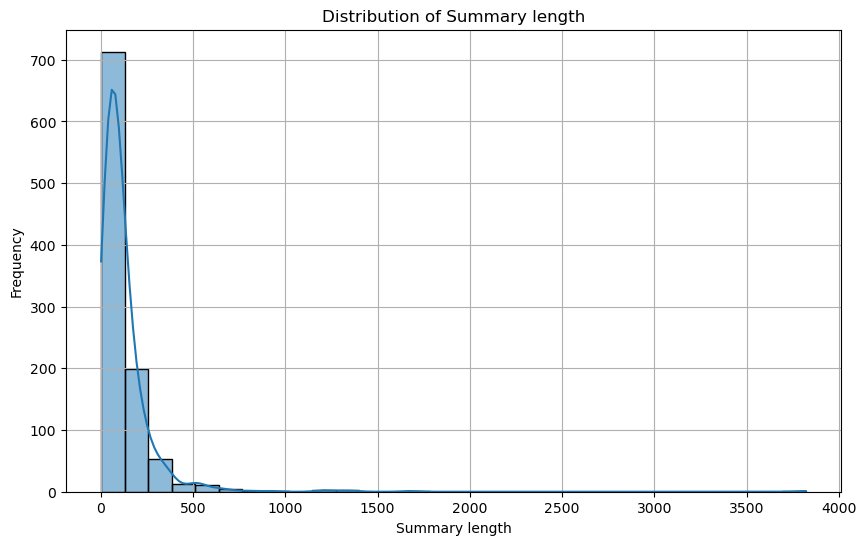

In [4]:
%reload_ext autoreload

from visualization.toxicity_plot import plot_toxicity_distribution

# plot document toxicity distribution
plot_toxicity_distribution(top_1000['document_toxicity_detoxify'])


# plot baseline summaries toxicity distribution
plot_toxicity_distribution(top_1000['summary_toxicity_detoxify'], label='Distribution of Baseline Summaries toxicity')

# plot document length distribution
plot_toxicity_distribution(top_1000['document_length'], label='Distribution of Document length', x_label='Document length')


# plot summary length distribution
plot_toxicity_distribution(top_1000['summary_length_baseline'], label='Distribution of Summary length', x_label='Summary length')



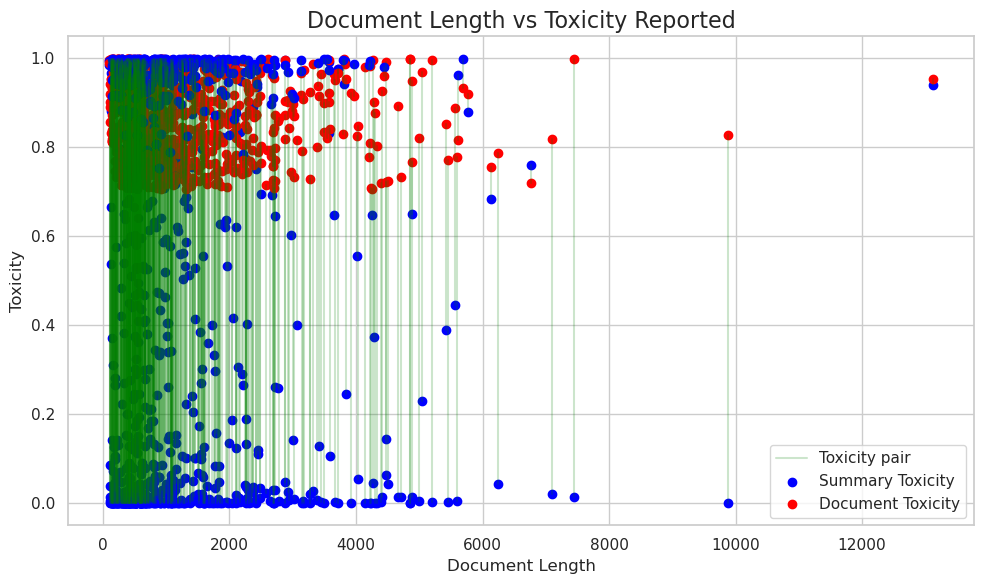

In [7]:
from visualization.toxicity_plot import plot_toxicity_comparison_with_length

plot_toxicity_comparison_with_length(top_1000['summary_toxicity_detoxify'], top_1000['document_toxicity_detoxify'], top_1000['document_length'])

In [8]:
top_1000['document'].keys()

Index([ 6231, 13476, 17876,   478, 18372, 16120,   712,  8088, 15818,  1509,
       ...
       17016,  4174, 13674, 11686, 10779,  8262, 13657, 15365,  6014, 11522],
      dtype='int64', length=1000)

In [9]:
print(top_1000['document'][712]+ '\n')
print(top_1000['summary_baseline'][712]+'\n')
print(top_1000['summary_toxicity_detoxify'][712])

Oh, fuck that shit. 
 No child should be raised in the welfare system. Why? 
 Because no parents should be depending on welfare for that long. 
 Not everything should just be handed over to you on a silver platter. Guess what, some people are dealt rough hands in life and some people downright suck at it. 
 I don't work my ass off so I can go and support some dumb shit who can't keep her legs closed long enough to prevent an 8lb public fund siphoning leech from popping out.  I did it so I can go buy nice suits, I can go eat at fancy restaurants, and I can afford to go on multiple vacations a year. 
 Welfare isn't supposed to be a sustainable lifestyle. It's supposed to support people for a short time while they find an actual job. 
 Get some personal responsibility. The government shouldn't be holding your hand and wiping your nose every time you fall down. Be a fucking adult and  sort your fucking life out.

Welfare isn't supposed to be fun, tough shit.

0.920504093170166


In [4]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

import torch
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))


True
0
NVIDIA RTX 500 Ada Generation Laptop GPU


In [41]:
from transformers import AutoTokenizer

# Load the tokenizer for your model
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")

# Your input text
input_text = top_1000['document'][5760]

# Tokenize the input text
tokens = tokenizer(input_text)

# Get the number of tokens
num_tokens = len(tokens['input_ids'])  # Length of the input IDs gives the number of tokens
print(f"Length calculated by len(): {len(input_text)}")
print(f"Number of tokens: {num_tokens}")

Length calculated by len(): 101
Number of tokens: 28


## Summarisation using BART and T5

In [ ]:

from summarizers.factory import SummarizerFactory
from datasets import Dataset

dataset = Dataset.from_pandas(top_1000)
summarizer_factory = SummarizerFactory()
summarizers = ['bart','t5']


for summarizer in summarizers:
    summaries = summarizer_factory.summarize(summarizer, top_1000['document'].values)
    top_1000[summarizer+'_summary'] = summaries
    top_1000[summarizer+'_summary_length'] = [len(summary) for summary in summaries]


# Save to CSV as a checkpoint
top_1000.to_csv("model_summaries_bart_t5_gpu.csv", index=False)
    





Device set to use cuda:0
Device set to use cuda:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 90. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 117. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 88. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)
Your max_length is set to 200, but your input_length is only 125. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=62)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 78. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=39)
Your max_length is set to 200, but your input_length is only 105. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 70. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=35)
Your max_length is set to 200, but your input_length is only 82. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=41)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 64. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)
Your max_length is set to 200, but your input_length is only 159. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=79)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 200, but your input_length is only 96. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 192. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=96)
Your max_length is set to 200, but your input_length is only 130. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=65)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 147. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=73)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 109. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=54)
Your max_length is set to 200, but your input_length is only 119. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 123. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)
Your max_length is set to 200, but your input_length is only 117. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 175. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=87)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 187. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=93)
Your max_length is set to 200, but your input_length is only 141. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=70)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 187. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=93)
Your max_length is set to 200, but your input_length is only 141. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=70)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 132. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=66)
Your max_length is set to 200, but your input_length is only 105. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 111. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 174. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=87)
Your max_length is set to 200, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 172. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=86)
Your max_length is set to 200, but your input_length is only 138. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=69)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 112. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 149. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=74)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 144. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=72)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 162. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=81)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 186. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=93)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 131. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=65)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 95. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)


chunking of 0
chunking of 969
chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 162. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=81)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 121. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 152. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=76)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 117. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)


chunking of 0
chunking of 969


Your max_length is set to 200, but your input_length is only 140. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=70)


chunking of 0
chunking of 969
chunking of 1938
chunking of 0
chunking of 969
chunking of 1938
chunking of 2907
chunking of 0
chunking of 969
chunking of 1938
chunking of 2907


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)
Your max_length is set to 200, but your input_length is only 151. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=75)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 67. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)
Your max_length is set to 200, but your input_length is only 95. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 85. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)
Your max_length is set to 200, but your input_length is only 111. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)
Your max_length is set to 200, but your input_length is only 116. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 78. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=39)
Your max_length is set to 200, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 103. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)
Your max_length is set to 200, but your input_length is only 113. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 68. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)
Your max_length is set to 200, but your input_length is only 130. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=65)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 67. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)
Your max_length is set to 200, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 69. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)
Your max_length is set to 200, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)
Your max_length is set to 200, but your input_length is only 84. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 99. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)
Your max_length is set to 200, but your input_length is only 127. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 74. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=37)
Your max_length is set to 200, but your input_length is only 150. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=75)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 74. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=37)
Your max_length is set to 200, but your input_length is only 116. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 60. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=30)
Your max_length is set to 200, but your input_length is only 96. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 66. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)
Your max_length is set to 200, but your input_length is only 143. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=71)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 77. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=38)
Your max_length is set to 200, but your input_length is only 98. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 148. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=74)
Your max_length is set to 200, but your input_length is only 90. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 62. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=31)
Your max_length is set to 200, but your input_length is only 115. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 91. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=45)
Your max_length is set to 200, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)
Your max_length is set to 200, but your input_length is only 98. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 68. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)
Your max_length is set to 200, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 111. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)
Your max_length is set to 200, but your input_length is only 69. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 67. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)
Your max_length is set to 200, but your input_length is only 84. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 75. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=37)
Your max_length is set to 200, but your input_length is only 83. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=41)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 64. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=32)
Your max_length is set to 200, but your input_length is only 103. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 85. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)
Your max_length is set to 200, but your input_length is only 107. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=53)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 153. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=76)
Your max_length is set to 200, but your input_length is only 143. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=71)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 118. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)
Your max_length is set to 200, but your input_length is only 134. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=67)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 101. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 200, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 152. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=76)
Your max_length is set to 200, but your input_length is only 112. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 66. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)
Your max_length is set to 200, but your input_length is only 120. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)
Your max_length is set to 200, but your input_length is only 79. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=39)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)
Your max_length is set to 200, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 113. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)
Your max_length is set to 200, but your input_length is only 144. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=72)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 127. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)
Your max_length is set to 200, but your input_length is only 97. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=48)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 114. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)
Your max_length is set to 200, but your input_length is only 120. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 181. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=90)
Your max_length is set to 200, but your input_length is only 98. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 200, but your input_length is only 136. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=68)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 200, but your input_length is only 119. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 128. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=64)
Your max_length is set to 200, but your input_length is only 86. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=43)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 143. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=71)
Your max_length is set to 200, but your input_length is only 118. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 180. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=90)
Your max_length is set to 200, but your input_length is only 119. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 149. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=74)
Your max_length is set to 200, but your input_length is only 121. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 159. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=79)
Your max_length is set to 200, but your input_length is only 120. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 139. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=69)
Your max_length is set to 200, but your input_length is only 134. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=67)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 114. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)
Your max_length is set to 200, but your input_length is only 98. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 161. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=80)
Your max_length is set to 200, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 108. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=54)
Your max_length is set to 200, but your input_length is only 113. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 190. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=95)
Your max_length is set to 200, but your input_length is only 98. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 107. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=53)
Your max_length is set to 200, but your input_length is only 107. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=53)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 142. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=71)
Your max_length is set to 200, but your input_length is only 124. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=62)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 146. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=73)
Your max_length is set to 200, but your input_length is only 140. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=70)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 133. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=66)
Your max_length is set to 200, but your input_length is only 127. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 133. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=66)
Your max_length is set to 200, but your input_length is only 105. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 143. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=71)
Your max_length is set to 200, but your input_length is only 126. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 148. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=74)
Your max_length is set to 200, but your input_length is only 112. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 133. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=66)
Your max_length is set to 200, but your input_length is only 121. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 129. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=64)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 149. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=74)
Your max_length is set to 200, but your input_length is only 117. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 133. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=66)
Your max_length is set to 200, but your input_length is only 185. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=92)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 174. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=87)
Your max_length is set to 200, but your input_length is only 121. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 141. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=70)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 127. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)
Your max_length is set to 200, but your input_length is only 132. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=66)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 168. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=84)
Your max_length is set to 200, but your input_length is only 144. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=72)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 172. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=86)
Your max_length is set to 200, but your input_length is only 144. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=72)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 195. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=97)
Your max_length is set to 200, but your input_length is only 138. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=69)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 187. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=93)
Your max_length is set to 200, but your input_length is only 160. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=80)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 153. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=76)
Your max_length is set to 200, but your input_length is only 83. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=41)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 177. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=88)
Your max_length is set to 200, but your input_length is only 120. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 119. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 189. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=94)
Your max_length is set to 200, but your input_length is only 118. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=59)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 184. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=92)
Your max_length is set to 200, but your input_length is only 160. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=80)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 198. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=99)
Your max_length is set to 200, but your input_length is only 117. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 183. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=91)
Your max_length is set to 200, but your input_length is only 137. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=68)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 145. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=72)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 198. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=99)
Your max_length is set to 200, but your input_length is only 166. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=83)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 171. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=85)
Your max_length is set to 200, but your input_length is only 95. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 187. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=93)
Your max_length is set to 200, but your input_length is only 112. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 111. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 105. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 190. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=95)
Your max_length is set to 200, but your input_length is only 163. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=81)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 136. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=68)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 94. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 135. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=67)


chunking of 0
chunking of 457
chunking of 914
chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 114. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 113. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 123. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 150. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=75)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 128. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=64)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 144. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=72)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 189. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=94)
Your max_length is set to 200, but your input_length is only 139. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=69)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 132. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=66)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 151. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=75)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 105. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 144. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=72)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 149. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=74)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 141. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=70)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 135. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=67)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 151. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=75)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 151. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=75)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 147. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=73)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 147. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=73)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 125. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=62)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 146. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=73)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 103. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 101. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 127. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 126. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 148. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=74)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 105. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 113. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=56)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 98. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=49)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 143. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=71)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 105. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 129. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=64)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 129. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=64)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 129. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=64)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 188. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=94)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 136. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=68)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 115. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 167. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=83)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 127. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=63)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 78. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=39)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 172. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=86)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 93. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 139. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=69)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 115. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 152. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=76)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 109. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=54)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 131. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=65)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 92. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=46)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 121. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 116. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=58)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 139. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=69)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 114. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 144. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=72)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 183. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=91)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 158. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=79)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 84. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 101. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 155. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=77)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 175. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=87)


chunking of 0
chunking of 457


Your max_length is set to 200, but your input_length is only 110. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=55)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 101. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 69. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=34)
Your max_length is set to 200, but your input_length is only 193. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=96)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 153. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=76)
Your max_length is set to 200, but your input_length is only 197. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=98)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 152. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=76)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 100. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)
Your max_length is set to 200, but your input_length is only 192. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=96)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 135. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=67)
Your max_length is set to 200, but your input_length is only 190. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=95)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 163. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=81)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 154. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=77)
Your max_length is set to 200, but your input_length is only 164. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=82)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 55. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=27)
Your max_length is set to 200, but your input_length is only 150. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=75)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 133. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=66)
Your max_length is set to 200, but your input_length is only 193. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=96)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 174. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=87)


chunking of 0
chunking of 457
chunking of 914
chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 188. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=94)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 188. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=94)
Your max_length is set to 200, but your input_length is only 152. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=76)


chunking of 0
chunking of 457
chunking of 914
chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 154. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=77)
Your max_length is set to 200, but your input_length is only 190. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=95)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 195. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=97)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 181. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=90)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 189. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=94)
Your max_length is set to 200, but your input_length is only 155. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=77)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 136. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=68)


chunking of 0
chunking of 457
chunking of 914
chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 186. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=93)


chunking of 0
chunking of 457
chunking of 914
chunking of 0
chunking of 457
chunking of 914
chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 172. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=86)


chunking of 0
chunking of 457
chunking of 914
chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 152. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=76)


chunking of 0
chunking of 457
chunking of 914
chunking of 0
chunking of 457
chunking of 914
chunking of 0
chunking of 457
chunking of 914
chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 182. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=91)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 195. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=97)


chunking of 0
chunking of 457
chunking of 914
chunking of 0
chunking of 457
chunking of 914
chunking of 1371


Your max_length is set to 200, but your input_length is only 193. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=96)


chunking of 0
chunking of 457
chunking of 914
chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 184. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=92)


chunking of 0
chunking of 457
chunking of 914
chunking of 1371
chunking of 0
chunking of 457
chunking of 914
chunking of 1371


Your max_length is set to 200, but your input_length is only 66. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)


chunking of 0
chunking of 457
chunking of 914
chunking of 1371


Your max_length is set to 200, but your input_length is only 101. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


chunking of 0
chunking of 457
chunking of 914


Your max_length is set to 200, but your input_length is only 162. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=81)


chunking of 0
chunking of 457
chunking of 914
chunking of 1371
chunking of 0
chunking of 457
chunking of 914
chunking of 1371
chunking of 0
chunking of 457
chunking of 914
chunking of 1371
chunking of 0
chunking of 457
chunking of 914
chunking of 1371
chunking of 0
chunking of 457
chunking of 914
chunking of 1371
chunking of 0
chunking of 457
chunking of 914
chunking of 1371
chunking of 1828


Your max_length is set to 200, but your input_length is only 121. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=60)


chunking of 0
chunking of 457
chunking of 914
chunking of 1371
chunking of 1828


Your max_length is set to 200, but your input_length is only 152. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=76)


chunking of 0
chunking of 457
chunking of 914
chunking of 1371
chunking of 1828
chunking of 2285
chunking of 0
chunking of 457
chunking of 914
chunking of 1371
chunking of 1828
chunking of 2285
chunking of 2742
chunking of 3199


Your max_length is set to 200, but your input_length is only 145. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=72)


chunking of 0
chunking of 457
chunking of 914
chunking of 1371
chunking of 1828
chunking of 2285
chunking of 2742
chunking of 3199


Your max_length is set to 200, but your input_length is only 70. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=35)


In [31]:
display(top_1000['bart_summary_length'])
display(top_1000['summary_length_baseline'])
display(top_1000['document_length'])
display(top_1000['t5_summary_length'])

6231     204
8088     216
660      227
478      173
15818    223
712      229
17876    148
1509     141
16120    199
9100     198
Name: bart_summary_length, dtype: int64

6231      40
8088      28
660       29
478       32
15818     47
712       45
17876     19
1509     315
16120     73
9100     334
Name: summary_length_baseline, dtype: int64

6231      303
8088      376
660       390
478       530
15818     580
712       921
17876     962
1509     2610
16120    3815
9100     4855
Name: document_length, dtype: int64

6231     122
8088     114
660       92
478      146
15818    111
712      192
17876    286
1509     153
16120    127
9100     299
Name: t5_summary_length, dtype: int64

In [33]:
display(top_1000['bart_summary'][712])
display(top_1000['summary_baseline'][712])
display(top_1000['document'][712])
display(top_1000['t5_summary'][712])

"No child should be raised in the welfare system. Welfare isn't supposed to be a sustainable lifestyle. Get some personal responsibility. The government shouldn't be holding your hand and wiping your nose every time you fall down."

"Welfare isn't supposed to be fun, tough shit."

"Oh, fuck that shit. \n No child should be raised in the welfare system. Why? \n Because no parents should be depending on welfare for that long. \n Not everything should just be handed over to you on a silver platter. Guess what, some people are dealt rough hands in life and some people downright suck at it. \n I don't work my ass off so I can go and support some dumb shit who can't keep her legs closed long enough to prevent an 8lb public fund siphoning leech from popping out.  I did it so I can go buy nice suits, I can go eat at fancy restaurants, and I can afford to go on multiple vacations a year. \n Welfare isn't supposed to be a sustainable lifestyle. It's supposed to support people for a short time while they find an actual job. \n Get some personal responsibility. The government shouldn't be holding your hand and wiping your nose every time you fall down. Be a fucking adult and  sort your fucking life out."

"bob greene: no child should be raised in the welfare system . he says welfare isn't supposed to be a sustainable lifestyle . greene says it's supposed to support people while they find a job ."